# FINDING THE PRODUCTS SIMILIAR ON FLIPKART AND AMAZON

In [1]:
# IMPORTING THE LIBRARIES
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [6]:
df=pd.read_csv('flipkart_com-ecommerce_sample.csv')# FLIPKART_DATA
df1=pd.read_csv('amazon_data.csv',encoding='latin')# AMAZON DATAa

In [7]:
df.head()

,uniq_id,crawl_timestamp,product_url,product_name,product_category_tree,pid,retail_price,discounted_price,image,is_FK_Advantage_product,description,product_rating,overall_rating,brand,product_specifications
0,c2d766ca982eca8304150849735ffef9,2016-03-25 22:59:23 +0000,http://www.flipkart.com/alisha-solid-women-s-c...,Alisha Solid Women's Cycling Shorts,"[""Clothing >> Women's Clothing >> Lingerie, Sl...",SRTEH2FF9KEDEFGF,999.0,379.0,"[""http://img5a.flixcart.com/image/short/u/4/a/...",False,Key Features of Alisha Solid Women's Cycling S...,No rating available,No rating available,Alisha,"{""product_specification""=>[{""key""=>""Number of ..."
1,7f7036a6d550aaa89d34c77bd39a5e48,2016-03-25 22:59:23 +0000,http://www.flipkart.com/fabhomedecor-fabric-do...,FabHomeDecor Fabric Double Sofa Bed,"[""Furniture >> Living Room Furniture >> Sofa B...",SBEEH3QGU7MFYJFY,32157.0,22646.0,"[""http://img6a.flixcart.com/image/sofa-bed/j/f...",False,FabHomeDecor Fabric Double Sofa Bed (Finish Co...,No rating available,No rating available,FabHomeDecor,"{""product_specification""=>[{""key""=>""Installati..."
2,f449ec65dcbc041b6ae5e6a32717d01b,2016-03-25 22:59:23 +0000,http://www.flipkart.com/aw-bellies/p/itmeh4grg...,AW Bellies,"[""Footwear >> Women's Footwear >> Ballerinas >...",SHOEH4GRSUBJGZXE,999.0,499.0,"[""http://img5a.flixcart.com/image/shoe/7/z/z/r...",False,Key Features of AW Bellies Sandals Wedges Heel...,No rating available,No rating available,AW,"{""product_specification""=>[{""key""=>""Ideal For""..."
3,0973b37acd0c664e3de26e97e5571454,2016-03-25 22:59:23 +0000,http://www.flipkart.com/alisha-solid-women-s-c...,Alisha Solid Women's Cycling Shorts,"[""Clothing >> Women's Clothing >> Lingerie, Sl...",SRTEH2F6HUZMQ6SJ,699.0,267.0,"[""http://img5a.flixcart.com/image/short/6/2/h/...",False,Key Features of Alisha Solid Women's Cycling S...,No rating available,No rating available,Alisha,"{""product_specification""=>[{""key""=>""Number of ..."
4,bc940ea42ee6bef5ac7cea3fb5cfbee7,2016-03-25 22:59:23 +0000,http://www.flipkart.com/sicons-all-purpose-arn...,Sicons All Purpose Arnica Dog Shampoo,"[""Pet Supplies >> Grooming >> Skin & Coat Care...",PSOEH3ZYDMSYARJ5,220.0,210.0,"[""http://img5a.flixcart.com/image/pet-shampoo/...",False,Specifications of Sicons All Purpose Arnica Do...,No rating available,No rating available,Sicons,"{""product_specification""=>[{""key""=>""Pet Type"",..."


In [8]:
df1.head()

,uniq_id,crawl_timestamp,product_url,product_name,product_category_tree,pid,retail_price,discounted_price,image,is_FK_Advantage_product,description,product_rating,overall_rating,brand,product_specifications
0,c2d766ca982eca8304150849735ffef9,2016-03-25 22:59:23 +0000,http://www.flipkart.com/alisha-solid-women-s-c...,Alisha Solid Women's Cycling Shorts,"[""Clothing >> Women's Clothing >> Lingerie, Sl...",SRTEH2FF9KEDEFGF,982,438,"[""http://img5a.flixcart.com/image/short/u/4/a/...",False,Key Features of Alisha Solid Women's Cycling S...,No rating available,No rating available,Alisha,"{""product_specification""=>[{""key""=>""Number of ..."
1,7f7036a6d550aaa89d34c77bd39a5e48,2016-03-25 22:59:23 +0000,http://www.flipkart.com/fabhomedecor-fabric-do...,FabHomeDecor Fabric Double Sofa Bed,"[""Furniture >> Living Room Furniture >> Sofa B...",SBEEH3QGU7MFYJFY,32143,29121,"[""http://img6a.flixcart.com/image/sofa-bed/j/f...",False,FabHomeDecor Fabric Double Sofa Bed (Finish Co...,No rating available,No rating available,FabHomeDecor,"{""product_specification""=>[{""key""=>""Installati..."
2,f449ec65dcbc041b6ae5e6a32717d01b,2016-03-25 22:59:23 +0000,http://www.flipkart.com/aw-bellies/p/itmeh4grg...,AW Bellies,"[""Footwear >> Women's Footwear >> Ballerinas >...",SHOEH4GRSUBJGZXE,991,551,"[""http://img5a.flixcart.com/image/shoe/7/z/z/r...",False,Key Features of AW Bellies Sandals Wedges Heel...,No rating available,No rating available,AW,"{""product_specification""=>[{""key""=>""Ideal For""..."
3,0973b37acd0c664e3de26e97e5571454,2016-03-25 22:59:23 +0000,http://www.flipkart.com/alisha-solid-women-s-c...,Alisha Solid Women's Cycling Shorts,"[""Clothing >> Women's Clothing >> Lingerie, Sl...",SRTEH2F6HUZMQ6SJ,694,325,"[""http://img5a.flixcart.com/image/short/6/2/h/...",False,Key Features of Alisha Solid Women's Cycling S...,No rating available,No rating available,Alisha,"{""product_specification""=>[{""key""=>""Number of ..."
4,bc940ea42ee6bef5ac7cea3fb5cfbee7,2016-03-25 22:59:23 +0000,http://www.flipkart.com/sicons-all-purpose-arn...,Sicons All Purpose Arnica Dog Shampoo,"[""Pet Supplies >> Grooming >> Skin & Coat Care...",PSOEH3ZYDMSYARJ5,208,258,"[""http://img5a.flixcart.com/image/pet-shampoo/...",False,Specifications of Sicons All Purpose Arnica Do...,No rating available,No rating available,Sicons,"{""product_specification""=>[{""key""=>""Pet Type"",..."


In [11]:
df.isna().sum()

uniq_id                       0
crawl_timestamp               0
product_url                   0
product_name                  0
product_category_tree         0
pid                           0
retail_price                 78
discounted_price             78
image                         3
is_FK_Advantage_product       0
description                   2
product_rating                0
overall_rating                0
brand                      5864
product_specifications       14
dtype: int64

In [12]:
df[df['retail_price'].isna()]

,uniq_id,crawl_timestamp,product_url,product_name,product_category_tree,pid,retail_price,discounted_price,image,is_FK_Advantage_product,description,product_rating,overall_rating,brand,product_specifications
12,c29af37837afcaf44b779eca7c19295f,2016-03-25 22:59:23 +0000,http://www.flipkart.com/sicons-all-purpose-tea...,Sicons All Purpose Tea Tree Dog Shampoo,"[""Pet Supplies >> Grooming >> Skin & Coat Care...",PSOEH3ZYYFETGCCD,NaN,NaN,"[""http://img6a.flixcart.com/image/pet-shampoo/...",False,Specifications of Sicons All Purpose Tea Tree ...,No rating available,No rating available,Sicons,"{""product_specification""=>[{""key""=>""Pet Type"",..."
21,ea98a65ad1e1b8688eddf89fbc7b3e27,2016-03-25 22:59:23 +0000,http://www.flipkart.com/alisha-solid-women-s-c...,Alisha Solid Women's Cycling Shorts,"[""Clothing >> Women's Clothing >> Lingerie, Sl...",SRTEH2FD3ANFFMHP,NaN,NaN,"[""http://img6a.flixcart.com/image/short/m/g/y/...",False,Alisha Solid Women's Cycling Shorts - Buy Blac...,No rating available,No rating available,Alisha,NaN
76,64d5d4a258243731dc7bbb1eef49ad74,2016-04-30 03:22:56 +0000,http://www.flipkart.com/eurospa-cotton-terry-f...,Eurospa Cotton Terry Face Towel Set,"[""Baby Care >> Baby Bath & Skin >> Baby Bath T...",BTWEG6SHXTDB2A2Y,NaN,NaN,"[""http://img5a.flixcart.com/image/bath-towel/a...",False,Key Features of Eurospa Cotton Terry Face Towe...,No rating available,No rating available,Eurospa,"{""product_specification""=>[{""key""=>""Material"",..."
812,39ed975091fd6d1d3ef3a7d33b8c4360,2016-01-06 18:20:45 +0000,http://www.flipkart.com/fundoo-t-printed-men-s...,Fundoo T Printed Men's Track Suit,"[""Clothing >> Men's Clothing >> Sports Wear >>...",TKSED5CFETHWMD6N,NaN,NaN,"[""http://img5a.flixcart.com/image/track-suit/n...",False,Fundoo T Printed Men's Track Suit\n ...,No rating available,No rating available,NaN,"{""product_specification""=>[{""key""=>""Ideal For""..."
1318,115ecd52f86ebf7a5509d0959a2caaa0,2016-03-25 15:39:25 +0000,http://www.flipkart.com/techware-microwavable-...,Techware Microwavable Tea Cups WF13115 - Purpl...,"[""Kitchen & Dining >> Dinnerware & Crockery >>...",CNSEH3GZGG6VYT54,NaN,NaN,"[""http://img5a.flixcart.com/image/cup-saucer/t...",False,Key Features of Techware Microwavable Tea Cups...,No rating available,No rating available,Techware,"{""product_specification""=>[{""key""=>""Brand"", ""v..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16762,43fbafdae704714c6543690161d3adb1,2015-12-20 08:26:17 +0000,http://www.flipkart.com/muchmore-alloy-copper-...,Muchmore Alloy Copper Charm Bracelet,"[""Jewellery >> Bangles, Bracelets & Armlets >>...",BBAEDBQ8T2FKDWZ3,NaN,NaN,"[""http://img6a.flixcart.com/image/bangle-brace...",False,Muchmore Alloy Copper Charm Bracelet\n ...,No rating available,No rating available,Muchmore,"{""product_specification""=>[{""key""=>""Stretchabl..."
17634,9d37d5a4ce327fb84cec4f56a2f0ac38,2016-05-22 10:35:27 +0000,http://www.flipkart.com/friction-men-s-vest/p/...,FRICTION Men's Vest,"[""Clothing >> Men's Clothing >> Inner Wear & S...",VESEGWKDWA6WV6UY,NaN,NaN,"[""http://img6a.flixcart.com/image/vest/s/m/m/f...",False,Key Features of FRICTION Men's Vest Graphic pr...,No rating available,No rating available,FRICTION,"{""product_specification""=>[{""key""=>""Sleeve"", ""..."
19543,21c408cc5df0f78b3831ab1686c8dc68,2015-12-01 10:15:43 +0000,http://www.flipkart.com/karishma-women-s-a-lin...,Karishma Women's A-line Dress,"[""Clothing >> Women's Clothing >> Western Wear...",DREDZZTUSAHPHGUS,NaN,NaN,"[""http://img5a.flixcart.com/image/dress/h/5/p/...",False,Karishma Women's A-line Dress\n ...,4,4,NaN,"{""product_specification""=>[{""key""=>""Length"", ""..."
19599,c8db5fb95df382f7f5719609d0f02f80,2015-12-01 10:15:43 +0000,http://www.flipkart.com/l-appel-du-vide-women-...,L'appel Du Vide Women's Shift Dress,"[""Clothing >> Women's Clothing >> Western Wear...",DREEBMGNXJWYBEKS,NaN,NaN,"[""http://img6a.flixcart.com/image/dress/u/d/d/...",False,L'appel Du Vide Women's Shift Dr

In [13]:
rem_col=['uniq_id','crawl_timestamp','product_url','pid','image','description','product_specifications']

In [14]:
df.drop(columns=rem_col,inplace=True)
df1.drop(columns=rem_col,inplace=True)

In [15]:
df.head()

,product_name,product_category_tree,retail_price,discounted_price,is_FK_Advantage_product,product_rating,overall_rating,brand
0,Alisha Solid Women's Cycling Shorts,"[""Clothing >> Women's Clothing >> Lingerie, Sl...",999.0,379.0,False,No rating available,No rating available,Alisha
1,FabHomeDecor Fabric Double Sofa Bed,"[""Furniture >> Living Room Furniture >> Sofa B...",32157.0,22646.0,False,No rating available,No rating available,FabHomeDecor
2,AW Bellies,"[""Footwear >> Women's Footwear >> Ballerinas >...",999.0,499.0,False,No rating available,No rating available,AW
3,Alisha Solid Women's Cycling Shorts,"[""Clothing >> Women's Clothing >> Lingerie, Sl...",699.0,267.0,False,No rating available,No rating available,Alisha
4,Sicons All Purpose Arnica Dog Shampoo,"[""Pet Supplies >> Grooming >> Skin & Coat Care...",220.0,210.0,False,No rating available,No rating available,Sicons


In [16]:
df.isna().sum()

product_name                  0
product_category_tree         0
retail_price                 78
discounted_price             78
is_FK_Advantage_product       0
product_rating                0
overall_rating                0
brand                      5864
dtype: int64

In [24]:
df2=df['product_category_tree'].str.strip('[]').str.split(' >> ',expand=True)

In [27]:
df2.columns=['first','second','third','fourth','fifth','sixth','seventh','eigth']

In [29]:
df[df2.columns]=df2

In [32]:
df2=df1['product_category_tree'].str.strip('[]').str.split(' >> ',expand=True)
df2.columns=['first','second','third','fourth','fifth','sixth','seventh','eigth']

In [33]:
df1[df2.columns]=df2

In [35]:
df1.shape,df.shape

((20000, 16), (20000, 16))

In [49]:
rem_col=df.isna().mean()[df.isna().mean()>0.5].index

In [50]:
df.drop(columns=rem_col,inplace=True)
df1.drop(columns=rem_col,inplace=True)

In [77]:
df.isna().sum()

product_name                  0
product_category_tree         0
retail_price                  0
discounted_price              0
is_FK_Advantage_product       0
product_rating                0
overall_rating                0
brand                         0
first                         0
second                      328
third                      1457
fourth                     5876
dtype: int64

In [78]:
df1.isna().sum()

product_name                  0
product_category_tree         0
retail_price                  0
discounted_price              0
is_FK_Advantage_product       0
product_rating                0
overall_rating                0
brand                         0
first                         0
second                      328
third                      1457
fourth                     5876
dtype: int64

In [57]:
ret=df.groupby(['first'])['retail_price'].mean().to_dict()

In [56]:
df_null=df.loc[df['retail_price'].isna(),['first','retail_price']]

In [59]:
df_null['retail_price']=df_null['first'].replace(ret)

In [61]:
df.update(df_null)

In [62]:
ret=df1.groupby(['first'])['retail_price'].mean().to_dict()
df_null=df.loc[df['retail_price'].isna(),['first','retail_price']]
df_null['retail_price']=df_null['first'].replace(ret)
df1.update(df_null)

C:\Users\sanja\AppData\Local\Temp\ipykernel_25384\45264315.py:4: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df1.update(df_null)


In [66]:
df['retail_price'].fillna(value=df['retail_price'].median(),inplace=True)

In [67]:
df['discounted_price'].fillna(value=0,inplace=True)

In [70]:
df.head()

,product_name,product_category_tree,retail_price,discounted_price,is_FK_Advantage_product,product_rating,overall_rating,brand,first,second,third,fourth
0,Alisha Solid Women's Cycling Shorts,"[""Clothing >> Women's Clothing >> Lingerie, Sl...",999.0,379.0,False,No rating available,No rating available,Alisha,"""Clothing",Women's Clothing,"Lingerie, Sleep & Swimwear",Shorts
1,FabHomeDecor Fabric Double Sofa Bed,"[""Furniture >> Living Room Furniture >> Sofa B...",32157.0,22646.0,False,No rating available,No rating available,FabHomeDecor,"""Furniture",Living Room Furniture,Sofa Beds & Futons,FabHomeDecor Fabric Double Sofa Bed (Finish Co...
2,AW Bellies,"[""Footwear >> Women's Footwear >> Ballerinas >...",999.0,499.0,False,No rating available,No rating available,AW,"""Footwear",Women's Footwear,Ballerinas,"AW Bellies"""
3,Alisha Solid Women's Cycling Shorts,"[""Clothing >> Women's Clothing >> Lingerie, Sl...",699.0,267.0,False,No rating available,No rating available,Alisha,"""Clothing",Women's Clothing,"Lingerie, Sleep & Swimwear",Shorts
4,Sicons All Purpose Arnica Dog Shampoo,"[""Pet Supplies >> Grooming >> Skin & Coat Care...",220.0,210.0,False,No rating available,No rating available,Sicons,"""Pet Supplies",Grooming,Skin & Coat Care,Shampoo


In [71]:
df1.head()

,product_name,product_category_tree,retail_price,discounted_price,is_FK_Advantage_product,product_rating,overall_rating,brand,first,second,third,fourth
0,Alisha Solid Women's Cycling Shorts,"[""Clothing >> Women's Clothing >> Lingerie, Sl...",982.0,438,False,No rating available,No rating available,Alisha,"""Clothing",Women's Clothing,"Lingerie, Sleep & Swimwear",Shorts
1,FabHomeDecor Fabric Double Sofa Bed,"[""Furniture >> Living Room Furniture >> Sofa B...",32143.0,29121,False,No rating available,No rating available,FabHomeDecor,"""Furniture",Living Room Furniture,Sofa Beds & Futons,FabHomeDecor Fabric Double Sofa Bed (Finish Co...
2,AW Bellies,"[""Footwear >> Women's Footwear >> Ballerinas >...",991.0,551,False,No rating available,No rating available,AW,"""Footwear",Women's Footwear,Ballerinas,"AW Bellies"""
3,Alisha Solid Women's Cycling Shorts,"[""Clothing >> Women's Clothing >> Lingerie, Sl...",694.0,325,False,No rating available,No rating available,Alisha,"""Clothing",Women's Clothing,"Lingerie, Sleep & Swimwear",Shorts
4,Sicons All Purpose Arnica Dog Shampoo,"[""Pet Supplies >> Grooming >> Skin & Coat Care...",208.0,258,False,No rating available,No rating available,Sicons,"""Pet Supplies",Grooming,Skin & Coat Care,Shampoo


In [72]:
df['product_name']

0            Alisha Solid Women's Cycling Shorts
1            FabHomeDecor Fabric Double Sofa Bed
2                                     AW Bellies
3            Alisha Solid Women's Cycling Shorts
4          Sicons All Purpose Arnica Dog Shampoo
                          ...                   
19995             WallDesign Small Vinyl Sticker
19996    Wallmantra Large Vinyl Stickers Sticker
19997    Elite Collection Medium Acrylic Sticker
19998    Elite Collection Medium Acrylic Sticker
19999    Elite Collection Medium Acrylic Sticker
Name: product_name, Length: 20000, dtype: object

In [75]:
df.loc[df['brand'].isna(),:]

,product_name,product_category_tree,retail_price,discounted_price,is_FK_Advantage_product,product_rating,overall_rating,brand,first,second,third,fourth
25,Glus Wedding Lingerie Set,"[""Clothing >> Women's Clothing >> Lingerie, Sl...",1299.0,699.0,False,No rating available,No rating available,NaN,"""Clothing",Women's Clothing,"Lingerie, Sleep & Swimwear",Lingerie Sets
26,Veelys Shiny White Quad Roller Skates - Size 4...,"[""Sports & Fitness >> Other Sports >> Skating ...",3199.0,2499.0,False,No rating available,No rating available,NaN,"""Sports & Fitness",Other Sports,Skating,Skates
27,Bulaky vanity case Jewellery Vanity Case,"[""Beauty and Personal Care >> Makeup >> Vanity...",499.0,390.0,False,3,3,NaN,"""Beauty and Personal Care",Makeup,Vanity Boxes,"Bulaky Vanity Boxes"""
28,FDT Women's Leggings,"[""Clothing >> Women's Clothing >> Fusion Wear ...",699.0,309.0,False,No rating available,No rating available,NaN,"""Clothing",Women's Clothing,Fusion Wear,Leggings & Jeggings
29,Madcaps C38GR30 Men's Cargos,"[""Clothing >> Men's Clothing >> Cargos, Shorts...",2199.0,1699.0,False,No rating available,No rating available,NaN,"""Clothing",Men's Clothing,"Cargos, Shorts & 3/4ths",Cargos
...,...,...,...,...,...,...,...,...,...,...,...,...
19936,Purple Women Heels,"[""Footwear >> Women's Footwear >> Heels""]",1099.0,899.0,False,2,2,NaN,"""Footwear",Women's Footwear,"Heels""",None
19941,Pinq Chiq Women Heels,"[""Footwear >> Women's Footwear >> Heels""]",1099.0,769.0,False,No rating available,No rating available,NaN,"""Footwear",Women's Footwear,"Heels""",None
19953,La Isla Women Heels,"[""Footwear >> Women's Footwear >> Heels""]",2599.0,779.0,False,No rating available,No rating available,NaN,"""Footwear",Women's Footwear,"Heels""",None
19958,We Witches Comfy Hues Women Wedges,"[""Footwear >> Women's Footwear >> Wedges""]",899.0,899.0,False,5,5,NaN,"""Footwear",Women's Footwear,"Wedges""",None


In [76]:
df['brand'].fillna(value='local',inplace=True)
df1['brand'].fillna(value='local',inplace=True)

In [79]:
df.loc[df['second'].isna(),:]

,product_name,product_category_tree,retail_price,discounted_price,is_FK_Advantage_product,product_rating,overall_rating,brand,first,second,third,fourth
5,Eternal Gandhi Super Series Crystal Paper Weig...,"[""Eternal Gandhi Super Series Crystal Paper We...",430.0,430.0,False,No rating available,No rating available,Eternal Gandhi,"""Eternal Gandhi Super Series Crystal Paper Wei...",None,None,None
30,Bengal Blooms Rose Artificial Plant with Pot,"[""Bengal Blooms Rose Artificial Plant with Po...",799.0,579.0,False,No rating available,No rating available,Bengal Blooms,"""Bengal Blooms Rose Artificial Plant with Pot...",None,None,None
44,Vishudh Printed Women's Straight Kurta,"[""Vishudh Printed Women's Straight Kurta""]",999.0,499.0,False,No rating available,No rating available,Vishudh,"""Vishudh Printed Women's Straight Kurta""",None,None,None
45,Vishudh Printed Women's Straight Kurta,"[""Vishudh Printed Women's Straight Kurta""]",899.0,449.0,False,No rating available,No rating available,Vishudh,"""Vishudh Printed Women's Straight Kurta""",None,None,None
46,Vishudh Printed Women's Anarkali Kurta,"[""Vishudh Printed Women's Anarkali Kurta""]",2099.0,1049.0,False,No rating available,No rating available,Vishudh,"""Vishudh Printed Women's Anarkali Kurta""",None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...
19421,Pazel Slim Fit Men's Jeans,"[""Pazel Slim Fit Men's Jeans""]",1249.0,549.0,False,No rating available,No rating available,Pazel,"""Pazel Slim Fit Men's Jeans""",None,None,None
19431,SMART TRADERS Girls Bellies,"[""SMART TRADERS Girls Bellies""]",1299.0,650.0,False,No rating available,No rating available,SMART TRADERS,"""SMART TRADERS Girls Bellies""",None,None,None
19434,Corcepts Universal Tablet HD Ultra Clear Trans...,"[""Corcepts Universal Tablet HD Ultra Clear Tra...",999.0,399.0,False,No rating available,No rating available,Corcepts,"""Corcepts Universal Tablet HD Ultra Clear Tran...",None,None,None
19435,"Areon Luxurious Fragrance Long Lasting Car,Hom...","[""Areon Luxurious Fragrance Long Lasting Car,H...",499.0,269.0,False,No rating available,No rating available,Areon,"""Areon Luxurious Fragrance Long Lasting Car,Ho...",None,None,None


<AxesSubplot: >

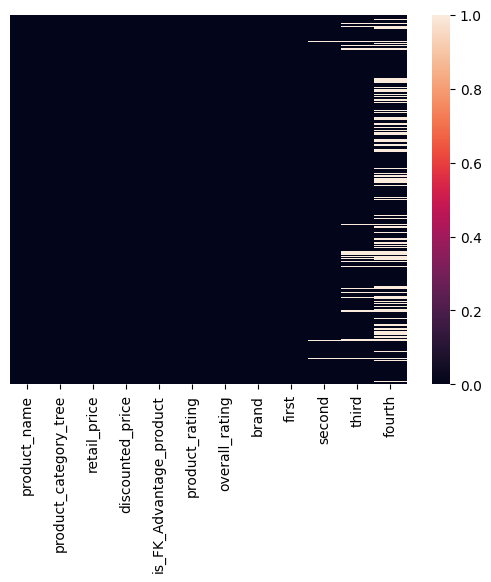

In [81]:
sns.heatmap(df.isna(),yticklabels=False)

In [82]:
for i in ['second','third','fourth']:
    df[i].fillna(value='Unknown',inplace=True)
    df1[i].fillna(value='Unknown',inplace=True)

In [83]:
df.isna().sum()

product_name               0
product_category_tree      0
retail_price               0
discounted_price           0
is_FK_Advantage_product    0
product_rating             0
overall_rating             0
brand                      0
first                      0
second                     0
third                      0
fourth                     0
dtype: int64

In [84]:
df.head()

,product_name,product_category_tree,retail_price,discounted_price,is_FK_Advantage_product,product_rating,overall_rating,brand,first,second,third,fourth
0,Alisha Solid Women's Cycling Shorts,"[""Clothing >> Women's Clothing >> Lingerie, Sl...",999.0,379.0,False,No rating available,No rating available,Alisha,"""Clothing",Women's Clothing,"Lingerie, Sleep & Swimwear",Shorts
1,FabHomeDecor Fabric Double Sofa Bed,"[""Furniture >> Living Room Furniture >> Sofa B...",32157.0,22646.0,False,No rating available,No rating available,FabHomeDecor,"""Furniture",Living Room Furniture,Sofa Beds & Futons,FabHomeDecor Fabric Double Sofa Bed (Finish Co...
2,AW Bellies,"[""Footwear >> Women's Footwear >> Ballerinas >...",999.0,499.0,False,No rating available,No rating available,AW,"""Footwear",Women's Footwear,Ballerinas,"AW Bellies"""
3,Alisha Solid Women's Cycling Shorts,"[""Clothing >> Women's Clothing >> Lingerie, Sl...",699.0,267.0,False,No rating available,No rating available,Alisha,"""Clothing",Women's Clothing,"Lingerie, Sleep & Swimwear",Shorts
4,Sicons All Purpose Arnica Dog Shampoo,"[""Pet Supplies >> Grooming >> Skin & Coat Care...",220.0,210.0,False,No rating available,No rating available,Sicons,"""Pet Supplies",Grooming,Skin & Coat Care,Shampoo


In [85]:
df.drop(columns=['product_category_tree'],inplace=True)
df1.drop(columns=['product_category_tree'],inplace=True)

In [86]:
df.head()

,product_name,retail_price,discounted_price,is_FK_Advantage_product,product_rating,overall_rating,brand,first,second,third,fourth
0,Alisha Solid Women's Cycling Shorts,999.0,379.0,False,No rating available,No rating available,Alisha,"""Clothing",Women's Clothing,"Lingerie, Sleep & Swimwear",Shorts
1,FabHomeDecor Fabric Double Sofa Bed,32157.0,22646.0,False,No rating available,No rating available,FabHomeDecor,"""Furniture",Living Room Furniture,Sofa Beds & Futons,FabHomeDecor Fabric Double Sofa Bed (Finish Co...
2,AW Bellies,999.0,499.0,False,No rating available,No rating available,AW,"""Footwear",Women's Footwear,Ballerinas,"AW Bellies"""
3,Alisha Solid Women's Cycling Shorts,699.0,267.0,False,No rating available,No rating available,Alisha,"""Clothing",Women's Clothing,"Lingerie, Sleep & Swimwear",Shorts
4,Sicons All Purpose Arnica Dog Shampoo,220.0,210.0,False,No rating available,No rating available,Sicons,"""Pet Supplies",Grooming,Skin & Coat Care,Shampoo


In [103]:
df['site']='flip'
df1['site']='ama'

In [100]:
fin_df=pd.concat([df,df1]).reset_index(drop=True)

In [101]:
fin_df['product_rating']=np.where(fin_df['product_rating']=='No rating available',0,fin_df['product_rating'])
fin_df['overall_rating']=np.where(fin_df['overall_rating']=='No rating available',0,fin_df['overall_rating'])

In [102]:
fin_df

,product_name,retail_price,discounted_price,is_FK_Advantage_product,product_rating,overall_rating,brand,first,second,third,fourth,flip,site,ama
0,Alisha Solid Women's Cycling Shorts,999.0,379.0,False,0,0,Alisha,"""Clothing",Women's Clothing,"Lingerie, Sleep & Swimwear",Shorts,1.0,flip,NaN
1,FabHomeDecor Fabric Double Sofa Bed,32157.0,22646.0,False,0,0,FabHomeDecor,"""Furniture",Living Room Furniture,Sofa Beds & Futons,FabHomeDecor Fabric Double Sofa Bed (Finish Co...,1.0,flip,NaN
2,AW Bellies,999.0,499.0,False,0,0,AW,"""Footwear",Women's Footwear,Ballerinas,"AW Bellies""",1.0,flip,NaN
3,Alisha Solid Women's Cycling Shorts,699.0,267.0,False,0,0,Alisha,"""Clothing",Women's Clothing,"Lingerie, Sleep & Swimwear",Shorts,1.0,flip,NaN
4,Sicons All Purpose Arnica Dog Shampoo,220.0,210.0,False,0,0,Sicons,"""Pet Supplies",Grooming,Skin & Coat Care,Shampoo,1.0,flip,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39995,WALLDESIGN SMALL VINYL STICKER,1498.0,876.0,False,0,0,WallDesign,"""Baby Care",Baby & Kids Gifts,Stickers,"WallDesign Stickers""",NaN,ama,0.0
39996,WALLMANTRA LARGE VINYL STICKERS STICKER,1415.0,1424.0,False,0,0,Wallmantra,"""Baby Care",Baby & Kids Gifts,Stickers,"Wallmantra Stickers""",NaN,ama,0.0
39997,ELITE COLLECTION MEDIUM ACRYLIC STICKER,1284.0,1196.0,False,0,0,Elite Collection,"""Baby Care",Baby & Kids Gifts,Stickers,"Elite Collection Stickers""",NaN,ama,0.0
39998,ELITE COLLECTION MEDIUM ACRYLIC STICKER,1492.0,1364.0,False,0,0,Elite Collection,"""Baby Care",Baby & Kids Gifts,Stickers,"Elite Collection Stickers""",NaN,ama,0.0


In [104]:
fin_df.drop(columns=['flip','ama'],inplace=True)

In [109]:
fin_df

,product_name,retail_price,discounted_price,is_FK_Advantage_product,product_rating,overall_rating,brand,first,second,third,fourth,site
0,Alisha Solid Women's Cycling Shorts,999.0,379.0,False,0,0,Alisha,"""Clothing",Women's Clothing,"Lingerie, Sleep & Swimwear",Shorts,flip
1,FabHomeDecor Fabric Double Sofa Bed,32157.0,22646.0,False,0,0,FabHomeDecor,"""Furniture",Living Room Furniture,Sofa Beds & Futons,FabHomeDecor Fabric Double Sofa Bed (Finish Co...,flip
2,AW Bellies,999.0,499.0,False,0,0,AW,"""Footwear",Women's Footwear,Ballerinas,"AW Bellies""",flip
3,Alisha Solid Women's Cycling Shorts,699.0,267.0,False,0,0,Alisha,"""Clothing",Women's Clothing,"Lingerie, Sleep & Swimwear",Shorts,flip
4,Sicons All Purpose Arnica Dog Shampoo,220.0,210.0,False,0,0,Sicons,"""Pet Supplies",Grooming,Skin & Coat Care,Shampoo,flip
...,...,...,...,...,...,...,...,...,...,...,...,...
39995,WALLDESIGN SMALL VINYL STICKER,1498.0,876.0,False,0,0,WallDesign,"""Baby Care",Baby & Kids Gifts,Stickers,"WallDesign Stickers""",ama
39996,WALLMANTRA LARGE VINYL STICKERS STICKER,1415.0,1424.0,False,0,0,Wallmantra,"""Baby Care",Baby & Kids Gifts,Stickers,"Wallmantra Stickers""",ama
39997,ELITE COLLECTION MEDIUM ACRYLIC STICKER,1284.0,1196.0,False,0,0,Elite Collection,"""Baby Care",Baby & Kids Gifts,Stickers,"Elite Collection Stickers""",ama
39998,ELITE COLLECTION MEDIUM ACRYLIC STICKER,1492.0,1364.0,False,0,0,Elite Collection,"""Baby Care",Baby & Kids Gifts,Stickers,"Elite Collection Stickers""",ama


In [111]:
from sklearn.preprocessing import OrdinalEncoder
oe=OrdinalEncoder(dtype=int)

In [122]:
fin_df['fourth']=oe.fit_transform(fin_df['fourth'].values.reshape(-1,1))

In [117]:
oe.categories_[0]

array(['1OAK', '3D Mat', '3a AUTOCARE', ..., 'zasmina', '\xa0Tarkan',
       'Â\xa0Tarkan'], dtype=object)

In [123]:
out=fin_df[['product_name','site']]

In [124]:
fin_df.drop(columns=['product_name','site'],inplace=True)

In [130]:
fin_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   retail_price             40000 non-null  float64
 1   discounted_price         40000 non-null  float64
 2   is_FK_Advantage_product  40000 non-null  bool   
 3   product_rating           40000 non-null  float64
 4   overall_rating           40000 non-null  float64
 5   brand                    40000 non-null  int32  
 6   first                    40000 non-null  int32  
 7   second                   40000 non-null  int32  
 8   third                    40000 non-null  int32  
 9   fourth                   40000 non-null  int32  
dtypes: bool(1), float64(4), int32(5)
memory usage: 2.0 MB


In [129]:
fin_df['product_rating']=fin_df['product_rating'].astype(float)
fin_df['overall_rating']=fin_df['overall_rating'].astype(float)

In [131]:
from sklearn.cluster import KMeans,AgglomerativeClustering

In [132]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()

In [134]:
fin_df_sc=pd.DataFrame(sc.fit_transform(fin_df),columns=fin_df.columns)

In [136]:
km=KMeans()

In [138]:
y_pred=km.fit_predict(fin_df_sc)

In [139]:
from sklearn.metrics  import silhouette_score

In [140]:
silhouette_score(fin_df_sc,y_pred)

0.2649102315590107

In [142]:
wcss=[]
for i in range(3,21,2):
    km=KMeans(n_clusters=i)
    km.fit(fin_df_sc)
    wcss.append(km.inertia_)

# ELBOW METHOD

Text(0, 0.5, 'wcss')

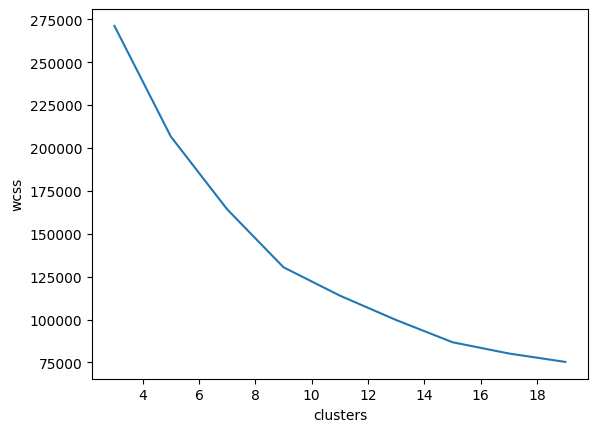

In [143]:
plt.plot(range(3,21,2),wcss)
plt.xlabel('clusters')

plt.ylabel('wcss')


In [144]:
km=KMeans(n_clusters=9)

In [145]:
y_pred=km.fit_predict(fin_df_sc)

In [146]:
silhouette_score(fin_df_sc,y_pred)

0.2776606421487907

In [147]:
out['clusters']=y_pred

C:\Users\sanja\AppData\Local\Temp\ipykernel_25384\586472425.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  out['clusters']=y_pred


In [175]:
out[['retail_price','discounted_price']]=fin_df[['retail_price','discounted_price']]

C:\Users\sanja\AppData\Local\Temp\ipykernel_25384\1845430958.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  out[['retail_price','discounted_price']]=fin_df[['retail_price','discounted_price']]
C:\Users\sanja\AppData\Local\Temp\ipykernel_25384\1845430958.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  out[['retail_price','discounted_price']]=fin_df[['retail_price','discounted_price']]


In [182]:
flip=out[out['site']=='flip']

In [183]:
ama=out[out['site']=='ama']

In [188]:
ans=pd.concat([flip,ama],axis=1)

In [158]:
flip.shape,ama.shape

((20000, 3), (20000, 3))

In [184]:
flip.reset_index(drop=True,inplace=True)
ama.reset_index(drop=True,inplace=True)

In [186]:
flip.columns=['product_name_flip', 'site_flip', 'clusters_flip','retail_price_flip','discounted_price_flip']
ama.columns=['product_name_ama', 'site_ama', 'clusters_ama','retail_price_ama','discounted_price_ama']

In [192]:
ans=ans[ans['clusters_flip']==ans['clusters_ama']]

In [198]:
fin_ans=ans[['product_name_flip','retail_price_flip','discounted_price_flip','product_name_ama','retail_price_ama','discounted_price_ama']]

In [197]:
flip[flip['product_name_flip']=='Alisha Solid Women\'s Cycling Shorts']

,product_name_flip,site_flip,clusters_flip,retail_price_flip,discounted_price_flip
0,Alisha Solid Women's Cycling Shorts,flip,8,999.000000,379.0
3,Alisha Solid Women's Cycling Shorts,flip,8,699.000000,267.0
6,Alisha Solid Women's Cycling Shorts,flip,8,1199.000000,479.0
9,Alisha Solid Women's Cycling Shorts,flip,8,1199.000000,479.0
13,Alisha Solid Women's Cycling Shorts,flip,8,999.000000,379.0
15,Alisha Solid Women's Cycling Shorts,flip,8,999.000000,379.0
21,Alisha Solid Women's Cycling Shorts,flip,8,1369.218441,0.0


In [201]:
fin_ans.reset_index(drop=True,inplace=True)

In [202]:
fin_ans

,product_name_flip,retail_price_flip,discounted_price_flip,product_name_ama,retail_price_ama,discounted_price_ama
0,Alisha Solid Women's Cycling Shorts,999.0,379.0,Alisha Solid Women's Cycling Shorts,982.0,438.0
1,FabHomeDecor Fabric Double Sofa Bed,32157.0,22646.0,FabHomeDecor Fabric Double Sofa Bed,32143.0,29121.0
2,AW Bellies,999.0,499.0,AW Bellies,991.0,551.0
3,Alisha Solid Women's Cycling Shorts,699.0,267.0,Alisha Solid Women's Cycling Shorts,694.0,325.0
4,Sicons All Purpose Arnica Dog Shampoo,220.0,210.0,Sicons All Purpose Arnica Dog Shampoo,208.0,258.0
...,...,...,...,...,...,...
19980,WallDesign Small Vinyl Sticker,1500.0,730.0,WALLDESIGN SMALL VINYL STICKER,1498.0,876.0
19981,Wallmantra Large Vinyl Stickers Sticker,1429.0,1143.0,WALLMANTRA LARGE VINYL STICKERS STICKER,1415.0,1424.0
19982,Elite Collection Medium Acrylic Sticker,1299.0,999.0,ELITE COLLECTION MEDIUM ACRYLIC STICKER,1284.0,1196.0
19983,Elite Collection Medium Acrylic Sticker,1499.0,1199.0,ELITE COLLECTION MEDIUM ACRYLIC STICKER,1492.0,1364.0


In [204]:
fin_ans['product_name_flip'].nunique()

12668

In [206]:
fin_ans.to_csv('CLUSTER_PRODUCT',index=False)